In [1]:
# Determine how many matches we have data for. Does it match the number we should have?
# How many rows are missing due to the data being scraped partway through the season? You can determine this by looking at the date column.
# Are there any teams that are missing more data than you'd expect?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [10]:
matches = pd.read_csv("matches.csv", index_col=0)
matches.head()


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,8/15/21,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Match Report,NaN,18,4,16.9,1,0,0,2022,Manchester City
2,8/21/21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Match Report,NaN,16,4,17.3,1,0,0,2022,Manchester City
3,8/28/21,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Match Report,NaN,25,10,14.3,0,0,0,2022,Manchester City
4,9/11/21,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Match Report,NaN,25,8,14.0,0,0,0,2022,Manchester City
6,9/18/21,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Match Report,NaN,16,1,15.7,1,0,0,2022,Manchester City


In [11]:
#Once the data file has been uploaded and read by CSV reader, the .info() function will show us the breakdown
#of the data 

matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1389 non-null   object 
 1   time          1389 non-null   object 
 2   comp          1389 non-null   object 
 3   round         1389 non-null   object 
 4   day           1389 non-null   object 
 5   venue         1389 non-null   object 
 6   result        1389 non-null   object 
 7   gf            1389 non-null   int64  
 8   ga            1389 non-null   int64  
 9   opponent      1389 non-null   object 
 10  xg            1389 non-null   float64
 11  xga           1389 non-null   float64
 12  poss          1389 non-null   int64  
 13  attendance    693 non-null    float64
 14  captain       1389 non-null   object 
 15  formation     1389 non-null   object 
 16  referee       1389 non-null   object 
 17  match report  1389 non-null   object 
 18  notes         0 non-null      

In [12]:
#Once the overall information has been obtained to assess values we can get more useful info by calculating the 
#overall number of games played to give us an idea of how much data to expect
#There are 2 seasons of data for 20 teams each playing 38 games per season thus;

print("There are", 2 * 20 * 38, "total games played over 2 seasons")

There are 1520 total games played over 2 seasons


In [13]:
#Now that we have calculated the total games played for all teams we can compare the expected results to
#the recorded results and see if there are any disparities
#This function explores the number of games each team played over the 2 years in consideration
#Teams that do not have 72 games played can be assumed to be missing data

matches['team'].value_counts()

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [14]:
#Now that we have a list of all 20 EPL teams that played in the 2 seasons we can parse the data
#Teams that do not have 72 total can be magnified as shown below

In [15]:
#I decided to verfiy the data counts using the 2 teams below but could have choosen others
matches[matches['team'] == 'Burnley'].head()
matches[matches['team'] == 'Liverpool'].head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,9/12/20,17:30,Premier League,Matchweek 1,Sat,Home,W,4,3,Leeds United,...,Match Report,NaN,20,4,17.0,0,2,2,2021,Liverpool
2,9/20/20,16:30,Premier League,Matchweek 2,Sun,Away,W,2,0,Chelsea,...,Match Report,NaN,17,5,17.7,1,0,0,2021,Liverpool
4,9/28/20,20:00,Premier League,Matchweek 3,Mon,Home,W,3,1,Arsenal,...,Match Report,NaN,21,9,16.8,0,0,0,2021,Liverpool
6,10/4/20,19:15,Premier League,Matchweek 4,Sun,Away,L,2,7,Aston Villa,...,Match Report,NaN,14,8,15.8,1,0,0,2021,Liverpool
7,10/17/20,12:30,Premier League,Matchweek 5,Sat,Away,D,2,2,Everton,...,Match Report,NaN,22,8,15.0,1,0,0,2021,Liverpool


In [16]:
#Once we investigate the teams using functions above to see disparity in recorded vs expected data
#We can cross refrence the matches played per week of season to see which matches lack data and where

matches["round"].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

In [17]:
#The above data shows that not all teams recorded 39 weeks of match data. Can we still work with partial data?
#Yes we can, the missing data above is the result of scrapping data mid-season from 2022

In [18]:
#Now lets look at the varying types of data in the list using dtpye function
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf                int64
ga                int64
opponent         object
xg              float64
xga             float64
poss              int64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh                int64
sot               int64
dist            float64
fk                int64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [19]:
#We see objects, int64, and float64
#Machine learning can only work with numeric data types, so other types of data will wither have to be excluded 
#Or converted to a usable form moving forward

#Lets convert date using pandas with a new column
matches['date'] = pd.to_datetime(matches['date'])
#Now display the result by calling matches again
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Match Report,NaN,18,4,16.9,1,0,0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Match Report,NaN,16,4,17.3,1,0,0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Match Report,NaN,25,10,14.3,0,0,0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Match Report,NaN,25,8,14.0,0,0,0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Match Report,NaN,16,1,15.7,1,0,0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,Tottenham,...,Match Report,NaN,8,1,17.4,0,0,0,2021,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,Crystal Palace,...,Match Report,NaN,7,0,11.4,1,0,0,2021,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,Everton,...,Match Report,NaN,10,3,17.0,0,0,0,2021,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,Newcastle Utd,...,Match Report,NaN,11,1,16.0,1,0,0,2021,Sheffield United


In [20]:
#We can see above that the date/time has not noticable changed but if we call the .dtypes we see below that
#date type has changed to a numeric value, allowing us to call and use it in future calculations 

matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                       int64
ga                       int64
opponent                object
xg                     float64
xga                    float64
poss                     int64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                       int64
sot                      int64
dist                   float64
fk                       int64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [21]:
#Next we will convert other columns to numeric data that can be used to gain insights
#We will start by considering Venues home vs away. We want to convert these values so we can assess
#Home field advantage = Venues(Home vs Away)

matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches

#The appended venure_code is placed at the end of the called list with 0 or 1 values
#We casted the column 'venue' using .astype to convert to a category and then .cat.codes to apply a 
#Numerical value to the items in the new category

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,NaN,18,4,16.9,1,0,0,2022,Manchester City,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,NaN,16,4,17.3,1,0,0,2022,Manchester City,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,NaN,25,10,14.3,0,0,0,2022,Manchester City,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,NaN,25,8,14.0,0,0,0,2022,Manchester City,0
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,NaN,16,1,15.7,1,0,0,2022,Manchester City,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,Tottenham,...,NaN,8,1,17.4,0,0,0,2021,Sheffield United,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,Crystal Palace,...,NaN,7,0,11.4,1,0,0,2021,Sheffield United,1
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,Everton,...,NaN,10,3,17.0,0,0,0,2021,Sheffield United,0
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,Newcastle Utd,...,NaN,11,1,16.0,1,0,0,2021,Sheffield United,0


In [22]:
#We will now do the same for the opponents category to supply us with a numeric value we can work with

matches['opp_code'] = matches['opponent'].astype('category').cat.codes
matches

#Notice the newly appended 'opp_code' to the right 

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,18,4,16.9,1,0,0,2022,Manchester City,0,18
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,16,4,17.3,1,0,0,2022,Manchester City,1,15
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,25,10,14.3,0,0,0,2022,Manchester City,1,0
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,25,8,14.0,0,0,0,2022,Manchester City,0,10
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,16,1,15.7,1,0,0,2022,Manchester City,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,Tottenham,...,8,1,17.4,0,0,0,2021,Sheffield United,0,18
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,Crystal Palace,...,7,0,11.4,1,0,0,2021,Sheffield United,1,6
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,Everton,...,10,3,17.0,0,0,0,2021,Sheffield United,0,7
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,Newcastle Utd,...,11,1,16.0,1,0,0,2021,Sheffield United,0,14


<AxesSubplot:xlabel='sot', ylabel='Density'>

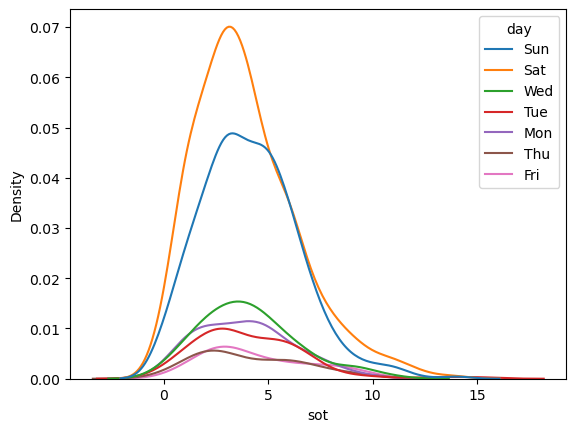

In [23]:
#Let's look at some interesting seaborn plots of the cleaned data we currently have to probe for useful starting points for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv("matches.csv")
sns.kdeplot(data=df1, x='sot', hue='day')

In [24]:
#Interestingly enough we can see that a much higher density of 'sot' (shots on target) occur on weekends as opposed to 
#Weekdays 

<AxesSubplot:xlabel='sh', ylabel='Density'>

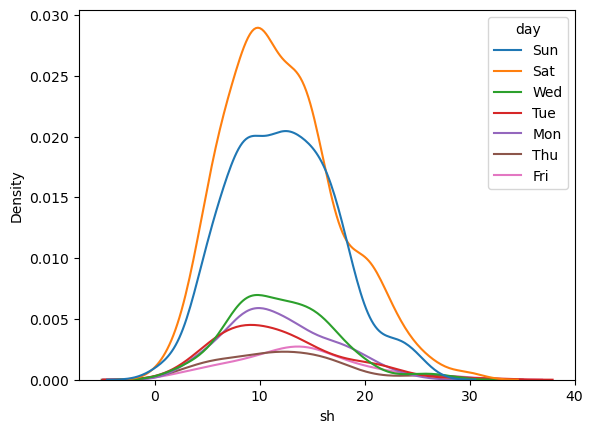

In [25]:
sns.kdeplot(data=df1, x='sh', hue='day')
#Below we plotted the total shots 'sh' against the days in which they occured and we see a near identical pattern of 
#Shot distributions across weekends and weekdays. 

<AxesSubplot:xlabel='sot', ylabel='Density'>

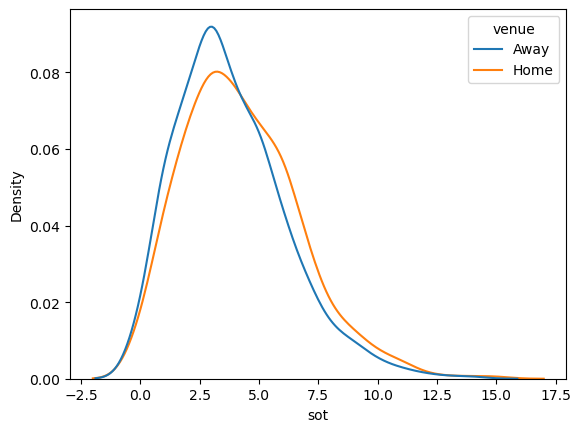

In [46]:
sns.kdeplot(data=df1, x='sot', hue='venue')
#This plot verifies that more shots on target occur away than at home

In [26]:
#What other variables should we consider when assessing a team's winning chances?
#Time of day is an important value to compare against the field of teams as some teams play better at night
#And some teams play more effectively during the day!
#First we need to convert the 'time' column to a numeric value:
# To do this we use str.replace function and specify what ":.+" (colon with nothing) with ("")
#The regex = True, or Regular Expression, is a sequence of characters that forms a search pattern. Also,
#RegEx can be used to check if a string contains the specified search pattern.
#The .astype('int') instructs the program to render a specific numeric value for selected values

matches['hour'] = matches['time'].str.replace(":.+", "", regex=True).astype('int')
matches

#If you look at the newest appended column we can see the results of the above function displayed

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,4,16.9,1,0,0,2022,Manchester City,0,18,16
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,4,17.3,1,0,0,2022,Manchester City,1,15,15
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,10,14.3,0,0,0,2022,Manchester City,1,0,12
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,8,14.0,0,0,0,2022,Manchester City,0,10,15
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,1,15.7,1,0,0,2022,Manchester City,1,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,Tottenham,...,1,17.4,0,0,0,2021,Sheffield United,0,18,19
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,Crystal Palace,...,0,11.4,1,0,0,2021,Sheffield United,1,6,15
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,Everton,...,3,17.0,0,0,0,2021,Sheffield United,0,7,19
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,Newcastle Utd,...,1,16.0,1,0,0,2021,Sheffield United,0,14,18


In [27]:
#We will convert 1 more column "Day" to a useful numeric form and append it to the table 

matches['day_code'] = matches['date'].dt.dayofweek
# matches['day_code'] = matches['day'].astype('category').cat.codes will produce an int value as well**
matches

#The table below shows the day_code has assigned a value 1-7 to the days of the week
#This allows comparisons and use within functions moving forward

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,16.9,1,0,0,2022,Manchester City,0,18,16,6
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,17.3,1,0,0,2022,Manchester City,1,15,15,5
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,14.3,0,0,0,2022,Manchester City,1,0,12,5
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,14.0,0,0,0,2022,Manchester City,0,10,15,5
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,15.7,1,0,0,2022,Manchester City,1,17,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,Tottenham,...,17.4,0,0,0,2021,Sheffield United,0,18,19,6
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,Crystal Palace,...,11.4,1,0,0,2021,Sheffield United,1,6,15,5
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,Everton,...,17.0,0,0,0,2021,Sheffield United,0,7,19,6
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,Newcastle Utd,...,16.0,1,0,0,2021,Sheffield United,0,14,18,2


In [28]:
#Once we have converted the above columns to numeric values we can begin to construct our algorithm 

In [29]:
#Our first target is to determine whether a team won or lost each match they played 
#To do this we create a new column and filter the results against 'W'
#This will return a Boolean value that isn't helpful so we convert it with .astype('int') 
#To get 1 for a win and a 0 for a loss or draw
matches['target'] = (matches['result'] == 'W').astype('int')
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,1,0,0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,1,0,0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,0,0,0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,0,0,0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,1,0,0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,Tottenham,...,0,0,0,2021,Sheffield United,0,18,19,6,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,Crystal Palace,...,1,0,0,2021,Sheffield United,1,6,15,5,0
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,Everton,...,0,0,0,2021,Sheffield United,0,7,19,6,1
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,Newcastle Utd,...,1,0,0,2021,Sheffield United,0,14,18,2,0


In [30]:
#Now we prepare to set up our machine learning using Sk learn functinalities
#Make sure Sk learn is imported before calling functionality 
from sklearn.ensemble import RandomForestClassifier

In [31]:
#We assign RandomForestClassifier to rf for easy future calling
#Set the parameters of our algorthim n_estimators to the number of decisinon trees we want, the bigger the number
#The longer the run time, but too small a number and the results will be skewed 
#Smaple_splits is the number of samples considered per leaf of decision tree before split occurs 
#Random_state tells the function no matter how many times we run decision tree, the result will condense to 1 number

rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)


In [32]:
#When setting up training parameters for machine learning we must specify how to read the data
train = matches[matches['date'] < '2022-01-01']
#We must set train parameters to BEFORE 2022 bc we cannot iterate over data that isn't present
#Or expect the algorithm to 'learn' if we exclude relevant data

test = matches[matches['date'] > '2022-01-01']
#Test set must come after training set or else training wont occur
#The test parameters specify the range of data we want to test

#We set up our predictors in a list to call them inside functions below and guide the decision tree logic
predictors = ['venue_code', 'opp_code', 'hour', 'day_code']


In [33]:
#Now we fit our data to our target using predictors as guides 
rf.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [34]:
preds= rf.predict(test[predictors])

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
#The number output below from the function shows from 0-1 how well the predicition fit the acutal result
#The higher the number the greater the accuracy 
acc = accuracy_score(test['target'], preds)
acc

0.6123188405797102

In [37]:
#The above number indicates a 61.23% accuracy in prediciting the outcome of games
print("The Accuracy Score is "'{:.1%}'.format(acc))

The Accuracy Score is 61.2%


In [38]:
#We will now create a table to display the results side-by-side

In [39]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [40]:
#This table shows the predicted wins vs losses in table format via crosstab pandas function 

pd.crosstab(index=combined["actual"], columns = combined["prediction"])

prediction,0,1
actual,,
0,141,31
1,76,28


In [41]:
#We can see that our accuracy in predicting the outcomes of games was not optimal or even good
#Now that the first iteration of the algorithm has run we can see the results and adjust the code to get
#A tighter fit 

In [32]:
#To better understand the precision of our predictions we can use a precision_score function imported
#From sk learn 
from sklearn.metrics import precision_score

In [33]:
pre_score = precision_score(test["target"], preds)
pre_score

0.4745762711864407

In [34]:
print("The precision score is "'{:.1%}'.format(pre_score))
#The below number shows us how often we pradicted a winner correctly (not very good right now)

The precision score is 47.5%


In [35]:
#Below this line we will update the accuracy of the above algorithm by investigating more useful data points
#We shall begin by computing rolling averages for the teams

In [36]:
#The function below creates a grouped_matches value that we can call further down to see season results 
#Grouped by whatever teams we choose to call

grouped_matches = matches.groupby("team")

In [37]:
#Here we execute the above function by calling Liverpool and observing the results
group = grouped_matches.get_group("Manchester City")
group.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,1,0,0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,1,0,0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,0,0,0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,0,0,0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,1,0,0,2022,Manchester City,1,17,15,5,0


In [38]:
#Now we are ready to compute rolling averages by team, why is this useful?
#Say we want to look at how Liverpool was doing in week 4 relative to the previous weeks? 
#Or how did Liverpool perform the rest of season compared to week 5 and before?

def rolling_averages(group, cols, new_cols): # define rolling average parameters in function
    group = group.sort_values("date")        # sort the values in ascending order by date 
    rolling_stats = group[cols].rolling(3, closed='left').mean() #tells function to ignore week 5 data in calculation
    group[new_cols] = rolling_stats # assign rolling stats back to new_cols variable
    group = group.dropna(subset=new_cols) #exclude any data in the new_cols that doesn't contain numeric data, removes all rows containing missing values
    return group


In [39]:
#Once our function is defined above we must identify the cols we want to pass the function
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
#Now we define our new_cols with {c}_rolling, to instruct function to iterate over each selected cols
new_cols = [f"{c}_rolling" for c in cols]
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [40]:
#Now we will use def to call a specific team and examine the results 

rolling_averages(group, cols, new_cols)


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1,0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1,1,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0,2,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Premier League,Matchweek 29,Mon,Away,D,0,0,Crystal Palace,...,0,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Away,W,2,0,Burnley,...,5,1,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Premier League,Matchweek 32,Sun,Home,D,2,2,Liverpool,...,6,0,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Premier League,Matchweek 30,Wed,Home,W,3,0,Brighton,...,2,1,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000


In [41]:
#Great! We have calculated and appended the resulting data for the EPL teams 
#Now lets apply these rolling averages across all teams and group them by the teams

matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result  gf  ga         opponent  ...  \
team                                                                   ...   
Arsenal                 6   Sun  Home      W   2   1    Sheffield Utd  ...   
                        7   Sat  Away      L   0   1  Manchester City  ...   
                        9   Sun  Home      L   0   1   Leicester City  ...   
                        11  Sun  Away      W   1   0   Manchester Utd  ...   
                        13  Sun  Home      L   0   3      Aston Villa  ...   
...                         ...   ...    ...  ..  ..              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W   1   0          Everton  ...   
                        33  Fri  Home      L   2   3     Leeds United  ...   
                        34  Sat  Home      W   2   1      Aston Villa  ...   
                        35  Fri  Away      L   0   1    Newcastle Utd  ...   
                        36  Sun  Away      L   0   1          Burnley  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling  pkatt_rolling  
team    

In [42]:
#We applied the lambda function to each of those team data frames created by the groupby('team')
#to compute rolling averages and display results across the table

In [43]:
#To make the table more readable we will now drop the 'team' index 
matches_rolling = matches_rolling.droplevel('team')
matches_rolling
#The index is now restored, by dropping the extra index above, we can call each index with less code 

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2,1,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0,1,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0,1,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1,0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0,3,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1,0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2,3,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2,1,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0,1,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [44]:
#We will now make our life easier by reassigning indexing values to a range 0-1293 so we can call rows more efficiently
matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2,1,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0,1,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0,1,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1,0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0,3,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1,0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2,3,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2,1,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0,1,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [45]:
#Now that we have created a new set of 'predictors' we can update our previous algorithm 

def make_predictions(data, predictors):
    train = data[data['date'] < '2022-01-01']
    test = data[data['date'] > '2022-01-01']
    rf.fit(train[predictors], train['target'])
    preds= rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    precision = precision_score(test["target"], preds)
    return combined, precision 


In [46]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)

In [47]:
print("The precision improvement is", precision)

The precision improvement is 0.625


In [48]:
combined

,actual,predicted
55,0,0
56,1,0
57,1,0
58,1,1
59,1,1
...,...,...
1312,1,0
1313,0,0
1314,1,0
1315,0,0


In [49]:
#The code below joins the missing data specified in matches_rolling corresponding to the correct row indices
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [50]:
#Below we can see all relevant information we calculated previously in the code side-by-side, making it visually
#Simple to see predicted vs actual

combined

,actual,predicted,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


In [51]:
#Finally we want to combine home vs awat data
#Team name and opponent names are not consistnent in the list so we create a class that inherits from a dictionary we will make
#This way whenever someone inputs a team name spelled differently than in our dictionary, the program will 
#Automatically update it
class MissingDict(dict):
    __missing__ = lambda self, key: key
    
map_values = {
    "Brighton and Hove Albioin": "Brighton",
    "Manchester United": "Manchester Utd",
    "Newcastle United": "Newcastle Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"
}
mapping = MissingDict(**map_values)


In [52]:
#Here the new_team category is the same as the original team, but appended to the end for easy viewing
combined["new_team"] = combined["team"].map(mapping)
combined

,actual,predicted,date,team,opponent,result,new_team
55,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal
56,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal
57,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal
58,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal
59,1,1,2022-03-06,Arsenal,Watford,W,Arsenal
...,...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves


In [53]:
#This part of merge code specifies where and how we want to merge to table values within itself
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
243,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
244,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
245,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


In [54]:
#Lets say we now want to look more closely at specific matches where 1 team was projected to win and the other lose
#This is bc these matches the algorithm has a higher confidence in
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] == 0)]["actual_x"].value_counts()

1    27
0    13
Name: actual_x, dtype: int64

In [55]:
#In games where the algorithm predicted a win and was correct we see
print("Our algorithm correctly predicted", (27 / 40) * 100, "percent of games")

Our algorithm correctly predicted 67.5 percent of games


In [56]:
#That's a 20% improvemnt of performance!!!

In [57]:
merged[(merged["predicted_x"] == 0) & (merged["predicted_y"] == 0)]["actual_x"].value_counts()

0    102
1     62
Name: actual_x, dtype: int64

In [58]:
#Above we see the log of predicted losses vs actual losses
print("Our algorithm correctly predicted a loss", (102 / 164) * 100, "percent of the time")

Our algorithm correctly predicted a loss 62.19512195121951 percent of the time


In [16]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,8/15/21,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Match Report,NaN,18,4,16.9,1,0,0,2022,Manchester City
2,8/21/21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Match Report,NaN,16,4,17.3,1,0,0,2022,Manchester City
3,8/28/21,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Match Report,NaN,25,10,14.3,0,0,0,2022,Manchester City
4,9/11/21,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Match Report,NaN,25,8,14.0,0,0,0,2022,Manchester City
6,9/18/21,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Match Report,NaN,16,1,15.7,1,0,0,2022,Manchester City
